In [1]:
import pickle
import numpy as np
import tifffile as tiff
import matplotlib.pyplot as plt
import keras.models
%matplotlib inline

Using TensorFlow backend.


In [2]:
from evaluation import *

base dir:  /home/kolaleye/lustre/onitemi/data
cache dir:  /home/kolaleye/lustre/onitemi/data/working/train_data/patches
cache dir:  /home/kolaleye/lustre/onitemi/data/working/train_data/building_bitmaps
models dir:  /home/kolaleye/lustre/onitemi/data/working/models
keras:  2.0.5
tensorflow:  1.2.0


/apps/chpc/bio/python/3.6.0_gcc-6.3.0/lib/python3.6/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [13]:
f = open('/home/kolaleye/lustre/onitemi/data/working/train_data/patches/22678915_15_64.pickle', 'rb')
train_data = pickle.load(f)

In [14]:
def get_image(i=0):
    rgb_image=train_data['features'][i][0]
    label=train_data['labels'][i][0]
    test=rgb_image.reshape((1,64,64,3))
    return test,label,rgb_image

In [15]:
def get_images(n):
    images = []
    labels = []
    for i in range(n):
        rgb_image=train_data['features'][i][0]
        label=train_data['labels'][i][0]
        test=rgb_image.reshape((1,64,64,3))
        images.append(rgb_image)
        labels.append(label)
    return images, labels

In [16]:
images, labels = get_images(16)

In [17]:
def transform(patch,flip=True, mirror=True,rotations=[]):
    """Perform data augmentation on a patch.
    Args:
        patch (numpy array): The patch to be processed.
        flip (bool, optional): Up/down symetry.
        mirror (bool, optional): left/right symetry.
        rotations (int list, optional) : rotations to perform (angles in deg).
    Returns:
        array list: list of augmented patches
    """
    transformed_patches = [patch]
    for angle in rotations:
        transformed_patches.append(skimage.img_as_ubyte(rotate(patch, angle)))
    if flip:
        transformed_patches.append(np.flipud(patch))
    if mirror:
        transformed_patches.append(np.fliplr(patch))
    return transformed_patches

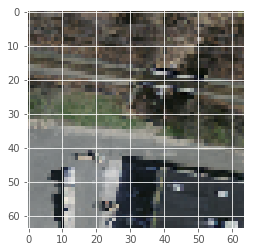

In [18]:
plt.imshow(images[0])

In [19]:
len(transform(labels[0]))

3

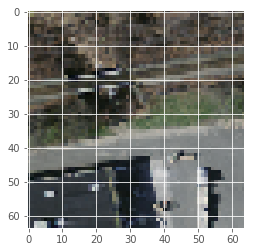

In [20]:
plt.imshow(transform(images[0])[2])

(-0.5, 63.5, 63.5, -0.5)

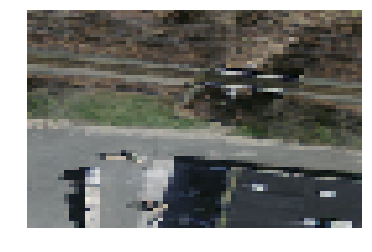

In [21]:
plt.imshow(images[0], aspect='auto')
plt.axis('off')

(-0.5, 63.5, 63.5, -0.5)

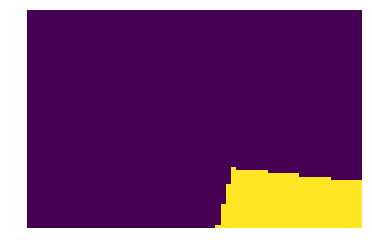

In [22]:
plt.imshow(labels[0], aspect='auto')
plt.axis('off')

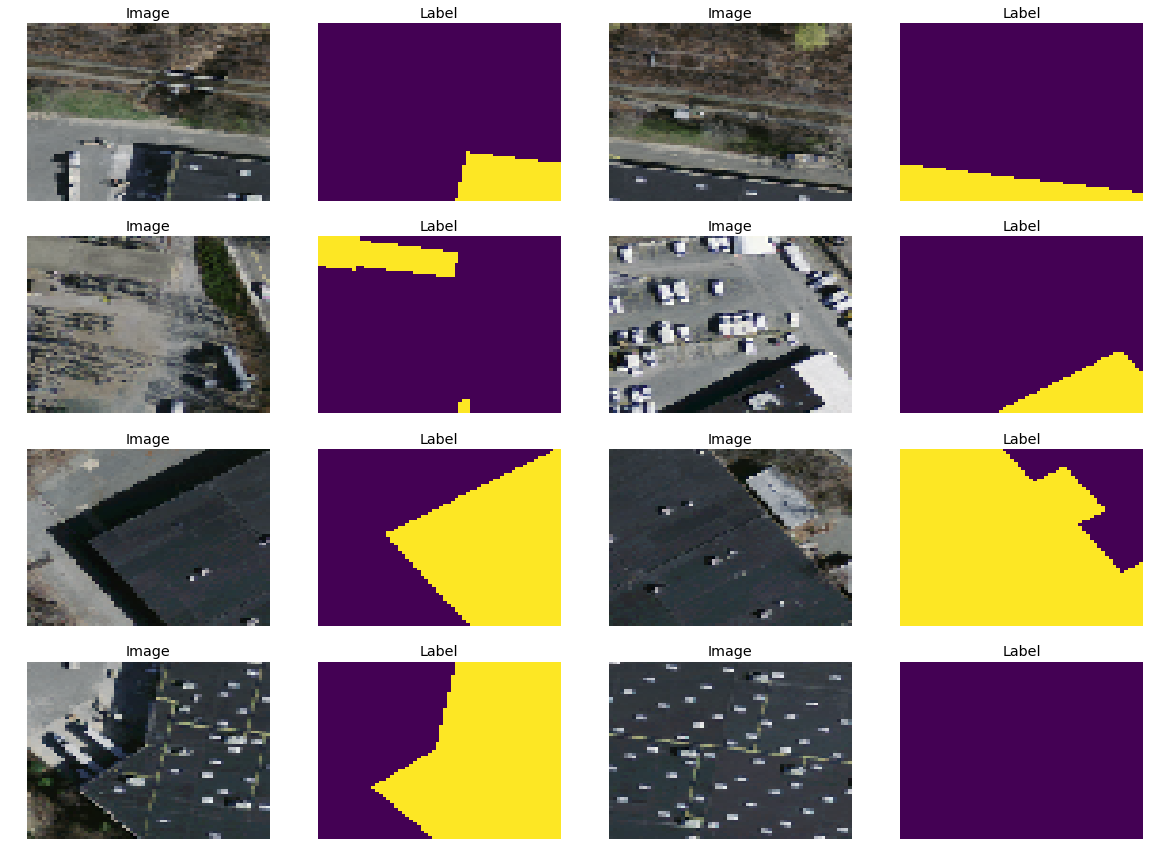

In [23]:
f, axarr = plt.subplots(4, 4, figsize=(20,15))
axarr[0, 0].imshow(images[0], aspect='auto')
axarr[0, 0].axis("off")
axarr[0, 0].set_title('Image')
axarr[0, 1].imshow(labels[0], aspect='auto')
axarr[0, 1].axis("off")
axarr[0, 1].set_title('Label')
axarr[0, 2].imshow(images[1], aspect='auto')
axarr[0, 2].axis("off")
axarr[0, 2].set_title('Image')
axarr[0, 3].imshow(labels[1], aspect='auto')
axarr[0, 3].axis("off")
axarr[0, 3].set_title('Label')
axarr[1, 0].imshow(images[2], aspect='auto')
axarr[1, 0].axis("off")
axarr[1, 0].set_title('Image')
axarr[1, 1].imshow(labels[2], aspect='auto')
axarr[1, 1].axis("off")
axarr[1, 1].set_title('Label')
axarr[1, 2].imshow(images[3], aspect='auto')
axarr[1, 2].axis("off")
axarr[1, 2].set_title('Image')
axarr[1, 3].imshow(labels[3], aspect='auto')
axarr[1, 3].axis("off")
axarr[1, 3].set_title('Label')
axarr[2, 0].imshow(images[4], aspect='auto')
axarr[2, 0].axis("off")
axarr[2, 0].set_title('Image')
axarr[2, 1].imshow(labels[4], aspect='auto')
axarr[2, 1].axis("off")
axarr[2, 1].set_title('Label')
axarr[2, 2].imshow(images[5], aspect='auto')
axarr[2, 2].axis("off")
axarr[2, 2].set_title('Image')
axarr[2, 3].imshow(labels[5], aspect='auto')
axarr[2, 3].axis("off")
axarr[2, 3].set_title('Label')
axarr[3, 0].imshow(images[6], aspect='auto')
axarr[3, 0].axis("off")
axarr[3, 0].set_title('Image')
axarr[3, 1].imshow(labels[6], aspect='auto')
axarr[3, 1].axis("off")
axarr[3, 1].set_title('Label')
axarr[3, 2].imshow(images[7], aspect='auto')
axarr[3, 2].axis("off")
axarr[3, 2].set_title('Image')
axarr[3, 3].imshow(labels[7], aspect='auto')
axarr[3, 3].axis("off")
axarr[3, 3].set_title('Label')

plt.savefig('../data/patches.png')
plt.show()

In [24]:
class params():
    def __init__(self):
        self.architecture='one_layer'
        self.patch_size=64
        #self.model_id='27_09_2017_1008_sentinel_one_layer'
        #self.model_id = '07_10_2017_1957_sentinel_one_layer'
        #self.model_id = '16_10_2017_1946_sentinel_one_layer'
        #self.model_id = '19_10_2017_1034_sentinel_one_layer'
        self.model_id = '06_11_2017_1807_sentinel_one_layer'
        self.model_dir="../data/working/models/"
        self.out_format="GeoTIFF"
        
    def load_model(self):
        """ Load a keras model and its weights with the given ID """
        
        model_dir = os.path.join(self.model_dir, self.model_id)

        print("Load model in {}.".format(model_dir))
        model_file = os.path.join(model_dir, "model.json")
        with open(model_file, "r") as f:
            json_file = f.read()
            model = keras.models.model_from_json(json_file)

        weights_file = os.path.join(model_dir, "weights.hdf5")
        model.load_weights(weights_file)

        return model

args=params()

hyperparameters = dict([
    ("architecture", args.architecture),
    # Hyperparameters for the first convolutional layer.
    ("nb_filters_1", 64),
    ("filter_size_1", 9),
    ("stride_1", (2, 2)),
    # Hyperparameter for the first pooling layer.
    ("pool_size_1", (2, 2)),
    # Hyperparameter for the second convolutional layer (when 
    # two layer architecture is used).
    ("nb_filters_2", 128),
    ("filter_size_2", 5),
    ("stride_2", (1, 1)),
    # Hyperparameters for Stochastic Gradient Descent.
    ("learning_rate", 0.05),
    ("momentum", 0.9),
    ("decay", 0.0)
    ])

In [25]:
from model import *
model = compile_model(args.load_model(), hyperparameters["learning_rate"], 
                      hyperparameters['momentum'], 
                      hyperparameters["decay"])


#evaluate_model(model, image_test, labels_test, args.patch_size,
#               args.model_dir, out_format=args.out_format)

Load model in ../data/working/models/06_11_2017_1807_sentinel_one_layer.


In [26]:
layer1=model.get_layer(index=4)

(-0.5, 63.5, 63.5, -0.5)

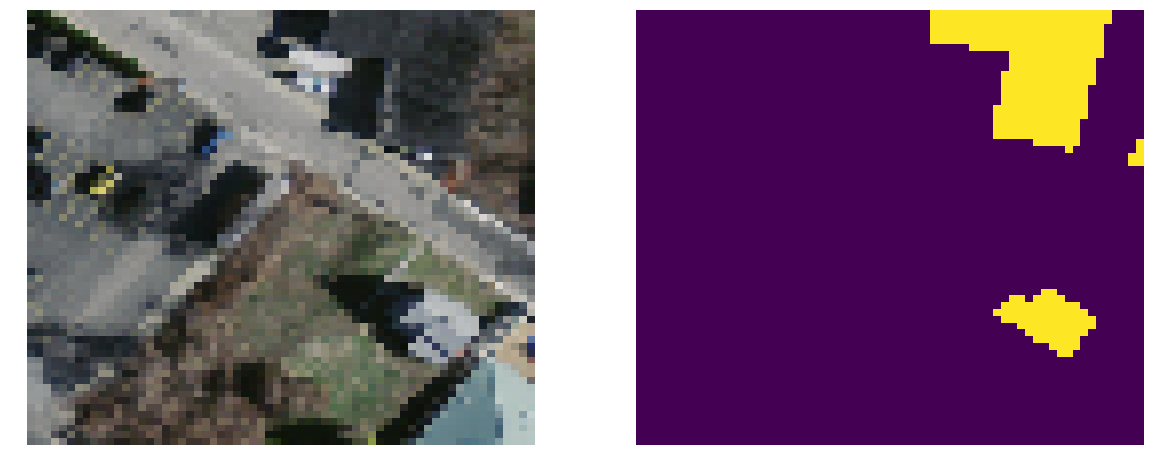

In [27]:
image,label,rgb = get_image(i=45)
fig,(ax,ax1)=plt.subplots(1,2,figsize=(20,8))
plt.sca(ax)
plt.imshow(rgb,aspect='auto')
plt.axis('off')
plt.sca(ax1)
plt.imshow(label,aspect='auto')
plt.axis('off')

In [28]:
label.sum()

362

In [29]:
label.shape

(64, 64)

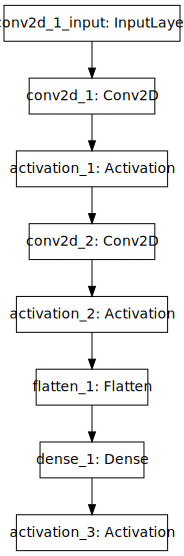

In [30]:
from keras.utils import plot_model
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG
#plot_model(model,'model.png')
#res=layer1.(test_image)

SVG(model_to_dot(model).create(prog='dot',format='svg'))

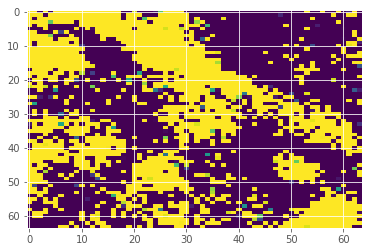

In [31]:
#plt.imshow(model.predict(image),aspect='auto')
plt.imshow(model.predict(image).reshape(64,64), aspect='auto')

In [32]:
sum_pred = model.predict(image).sum()

In [33]:
pred = model.predict(image)

In [34]:
len(pred.reshape(64,64))

64

In [35]:
pred.reshape(64,64) * (label>0)

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [36]:
pred.reshape(64,64)[pred.reshape(64,64)>0.8]

array([ 1.        ,  1.        ,  0.98582667, ...,  1.        ,
        1.        ,  1.        ], dtype=float32)

In [39]:
len(np.argmax(np.reshape(label, [64,64]), axis=0))

64

In [40]:
len(np.argmax(np.reshape(pred, [64,64]), axis=0))

64

In [41]:
pred[0,:].shape

(4096,)

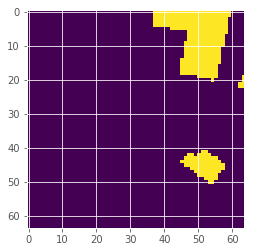

In [42]:
plt.imshow(label)

In [43]:
#model.predict(image).shape

In [44]:
from keras.models import Model
layer_name='activation_1'                 #params = (Width-Filter_size+Padding(=1))/Stride
layer_out=Model(inputs=model.input,outputs=model.get_layer(layer_name).output)
res1 = layer_out.predict(image)
#plt.imshow(res1,aspect='auto')
res1.shape

(1, 28, 28, 64)

In [45]:
#plt.imshow(res1.reshape(64,64))

In [46]:
#out_conv2d_1 = res1[:,:,:].reshape(28,28,64)

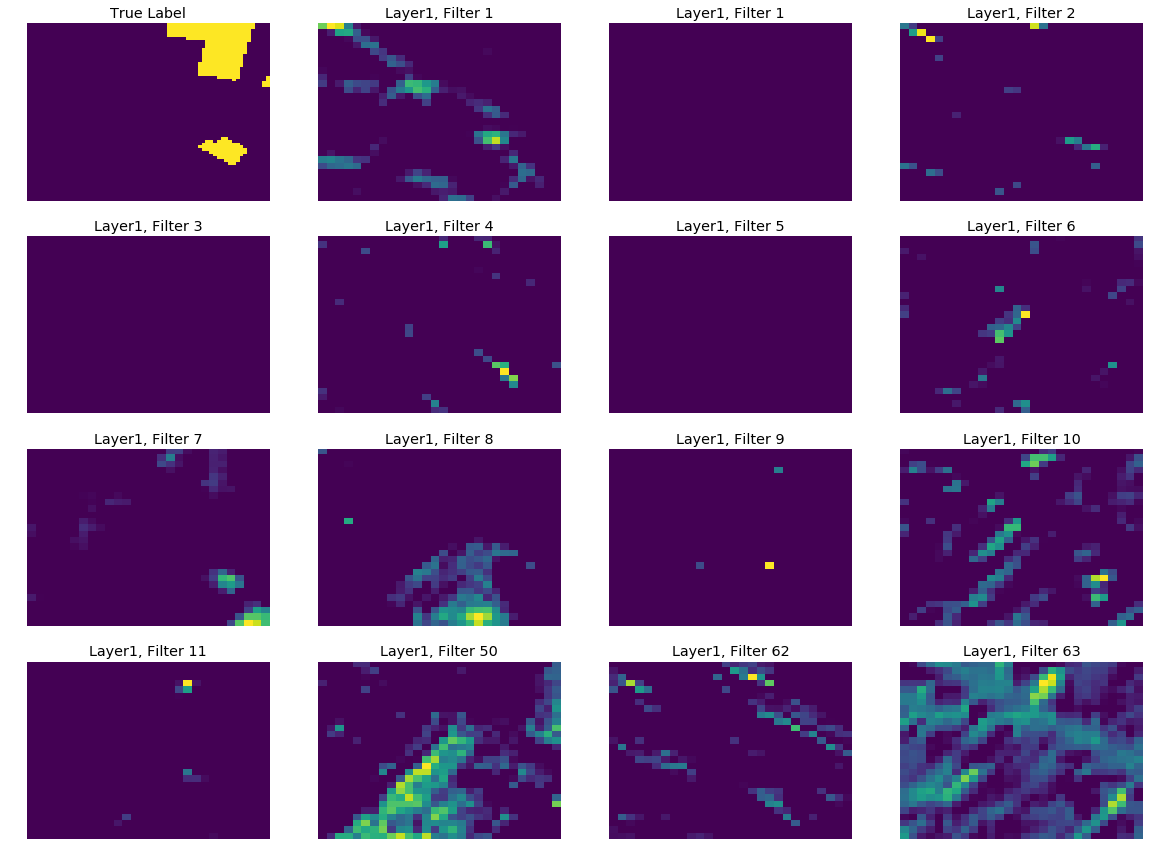

In [47]:
f, axarr = plt.subplots(4, 4, figsize=(20,15))
axarr[0, 0].imshow(label, aspect='auto')
axarr[0, 0].axis("off")
axarr[0, 0].set_title('True Label')
axarr[0, 1].imshow(res1[0,:,:,0], aspect='auto')
axarr[0, 1].axis("off")
axarr[0, 1].set_title('Layer1, Filter 1')
axarr[0, 2].imshow(res1[0,:,:,1], aspect='auto')
axarr[0, 2].axis("off")
axarr[0, 2].set_title('Layer1, Filter 1')
axarr[0, 3].imshow(res1[0,:,:,2], aspect='auto')
axarr[0, 3].axis("off")
axarr[0, 3].set_title('Layer1, Filter 2')
axarr[1, 0].imshow(res1[0,:,:,3], aspect='auto')
axarr[1, 0].axis("off")
axarr[1, 0].set_title('Layer1, Filter 3')
axarr[1, 1].imshow(res1[0,:,:,4], aspect='auto')
axarr[1, 1].axis("off")
axarr[1, 1].set_title('Layer1, Filter 4')
axarr[1, 2].imshow(res1[0,:,:,5], aspect='auto')
axarr[1, 2].axis("off")
axarr[1, 2].set_title('Layer1, Filter 5')
axarr[1, 3].imshow(res1[0,:,:,6], aspect='auto')
axarr[1, 3].axis("off")
axarr[1, 3].set_title('Layer1, Filter 6')
axarr[2, 0].imshow(res1[0,:,:,7], aspect='auto')
axarr[2, 0].axis("off")
axarr[2, 0].set_title('Layer1, Filter 7')
axarr[2, 1].imshow(res1[0,:,:,8], aspect='auto')
axarr[2, 1].axis("off")
axarr[2, 1].set_title('Layer1, Filter 8')
axarr[2, 2].imshow(res1[0,:,:,9], aspect='auto')
axarr[2, 2].axis("off")
axarr[2, 2].set_title('Layer1, Filter 9')
axarr[2, 3].imshow(res1[0,:,:,10], aspect='auto')
axarr[2, 3].axis("off")
axarr[2, 3].set_title('Layer1, Filter 10')
axarr[3, 0].imshow(res1[0,:,:,11], aspect='auto')
axarr[3, 0].axis("off")
axarr[3, 0].set_title('Layer1, Filter 11')
axarr[3, 1].imshow(res1[0,:,:,50], aspect='auto')
axarr[3, 1].axis("off")
axarr[3, 1].set_title('Layer1, Filter 50')
axarr[3, 2].imshow(res1[0,:,:,62], aspect='auto')
axarr[3, 2].axis("off")
axarr[3, 2].set_title('Layer1, Filter 62')
axarr[3, 3].imshow(res1[0,:,:,63], aspect='auto')
axarr[3, 3].axis("off")
axarr[3, 3].set_title('Layer1, Filter 63')

plt.savefig('../data/filters_layer_1.png')
plt.show()

In [48]:
layer_name='activation_2'                 #params = (Width-Filter_size+Padding(=1))/Stride
layer_out=Model(inputs=model.input,outputs=model.get_layer(layer_name).output)
res2 = layer_out.predict(image)
#plt.imshow(res1,aspect='auto')
res2.shape

(1, 24, 24, 128)

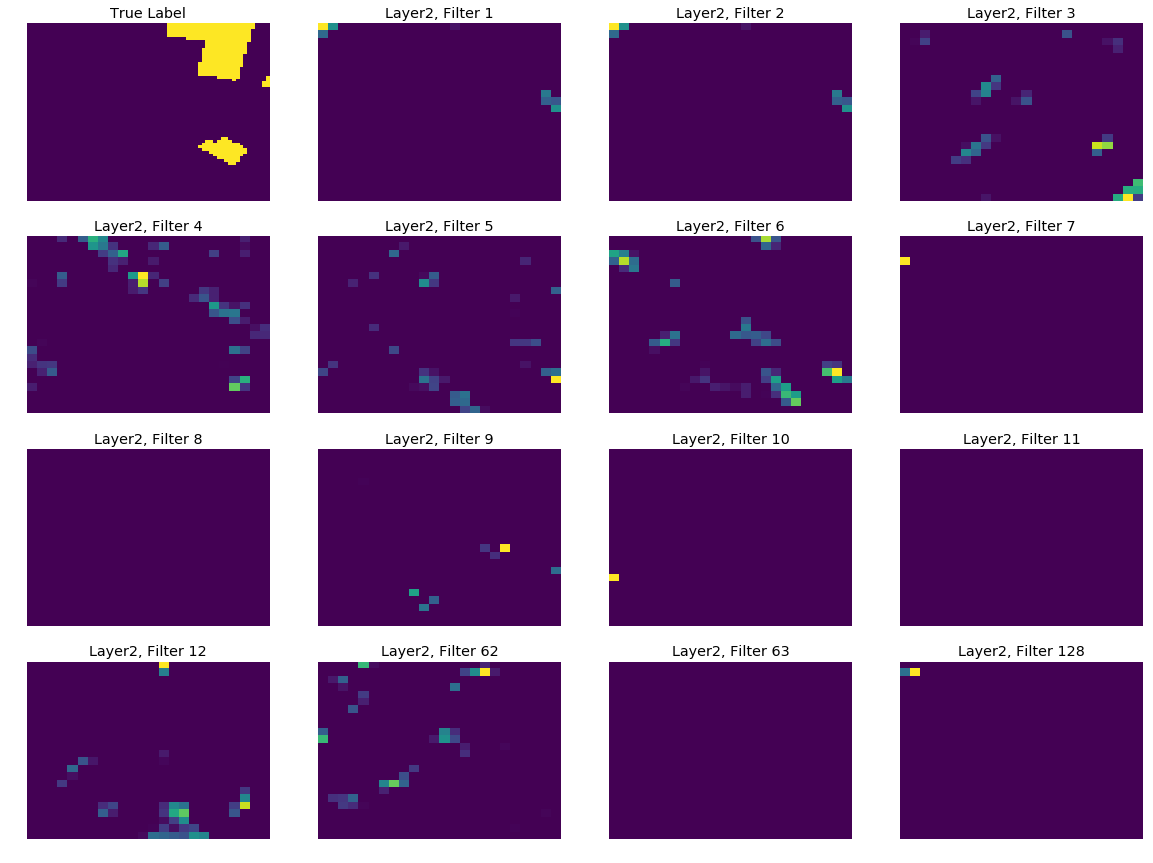

In [49]:
f, axarr = plt.subplots(4, 4, figsize=(20,15))
axarr[0, 0].imshow(label, aspect='auto')
axarr[0, 0].axis("off")
axarr[0, 0].set_title('True Label')
axarr[0, 1].imshow(res2[0,:,:,1], aspect='auto')
axarr[0, 1].axis("off")
axarr[0, 1].set_title('Layer2, Filter 1')
axarr[0, 2].imshow(res2[0,:,:,1], aspect='auto')
axarr[0, 2].axis("off")
axarr[0, 2].set_title('Layer2, Filter 2')
axarr[0, 3].imshow(res2[0,:,:,2], aspect='auto')
axarr[0, 3].axis("off")
axarr[0, 3].set_title('Layer2, Filter 3')
axarr[1, 0].imshow(res2[0,:,:,3], aspect='auto')
axarr[1, 0].axis("off")
axarr[1, 0].set_title('Layer2, Filter 4')
axarr[1, 1].imshow(res2[0,:,:,4], aspect='auto')
axarr[1, 1].axis("off")
axarr[1, 1].set_title('Layer2, Filter 5')
axarr[1, 2].imshow(res2[0,:,:,5], aspect='auto')
axarr[1, 2].axis("off")
axarr[1, 2].set_title('Layer2, Filter 6')
axarr[1, 3].imshow(res2[0,:,:,6], aspect='auto')
axarr[1, 3].axis("off")
axarr[1, 3].set_title('Layer2, Filter 7')
axarr[2, 0].imshow(res2[0,:,:,7], aspect='auto')
axarr[2, 0].axis("off")
axarr[2, 0].set_title('Layer2, Filter 8')
axarr[2, 1].imshow(res2[0,:,:,8], aspect='auto')
axarr[2, 1].axis("off")
axarr[2, 1].set_title('Layer2, Filter 9')
axarr[2, 2].imshow(res2[0,:,:,9], aspect='auto')
axarr[2, 2].axis("off")
axarr[2, 2].set_title('Layer2, Filter 10')
axarr[2, 3].imshow(res2[0,:,:,10], aspect='auto')
axarr[2, 3].axis("off")
axarr[2, 3].set_title('Layer2, Filter 11')
axarr[3, 0].imshow(res2[0,:,:,11], aspect='auto')
axarr[3, 0].axis("off")
axarr[3, 0].set_title('Layer2, Filter 12')
axarr[3, 1].imshow(res2[0,:,:,62], aspect='auto')
axarr[3, 1].axis("off")
axarr[3, 1].set_title('Layer2, Filter 62')
axarr[3, 2].imshow(res2[0,:,:,63], aspect='auto')
axarr[3, 2].axis("off")
axarr[3, 2].set_title('Layer2, Filter 63')
axarr[3, 3].imshow(res2[0,:,:,127], aspect='auto')
axarr[3, 3].axis("off")
axarr[3, 3].set_title('Layer2, Filter 128')

plt.savefig('../data/filters_layer_2.png')
plt.show()

In [50]:
layer_name='conv2d_2'                 #params = (Width-Filter_size+Padding(=1))/Stride
layer_out=Model(inputs=model.input,outputs=model.get_layer(layer_name).output)
res2 = layer_out.predict(image)
#plt.imshow(res1,aspect='auto')
res2.shape

(1, 24, 24, 128)

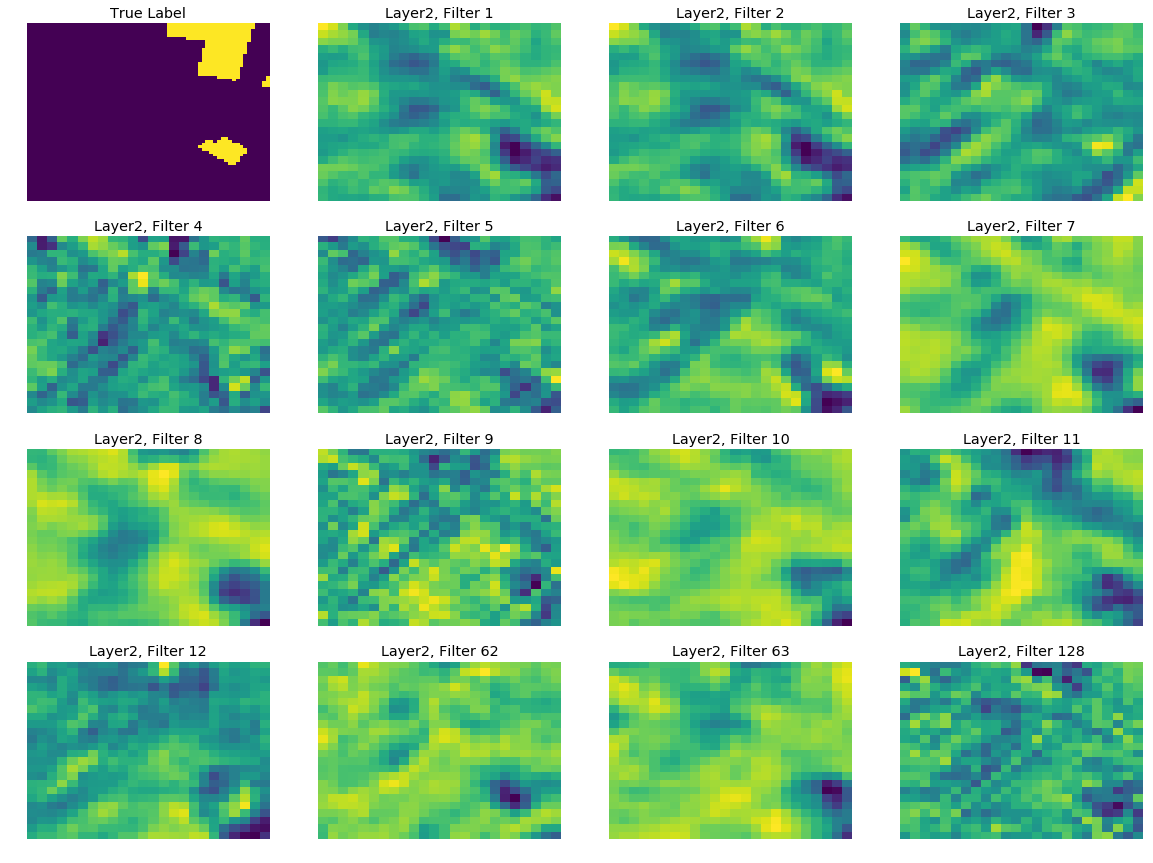

In [51]:
f, axarr = plt.subplots(4, 4, figsize=(20,15))
axarr[0, 0].imshow(label, aspect='auto')
axarr[0, 0].axis("off")
axarr[0, 0].set_title('True Label')
axarr[0, 1].imshow(res2[0,:,:,1], aspect='auto')
axarr[0, 1].axis("off")
axarr[0, 1].set_title('Layer2, Filter 1')
axarr[0, 2].imshow(res2[0,:,:,1], aspect='auto')
axarr[0, 2].axis("off")
axarr[0, 2].set_title('Layer2, Filter 2')
axarr[0, 3].imshow(res2[0,:,:,2], aspect='auto')
axarr[0, 3].axis("off")
axarr[0, 3].set_title('Layer2, Filter 3')
axarr[1, 0].imshow(res2[0,:,:,3], aspect='auto')
axarr[1, 0].axis("off")
axarr[1, 0].set_title('Layer2, Filter 4')
axarr[1, 1].imshow(res2[0,:,:,4], aspect='auto')
axarr[1, 1].axis("off")
axarr[1, 1].set_title('Layer2, Filter 5')
axarr[1, 2].imshow(res2[0,:,:,5], aspect='auto')
axarr[1, 2].axis("off")
axarr[1, 2].set_title('Layer2, Filter 6')
axarr[1, 3].imshow(res2[0,:,:,6], aspect='auto')
axarr[1, 3].axis("off")
axarr[1, 3].set_title('Layer2, Filter 7')
axarr[2, 0].imshow(res2[0,:,:,7], aspect='auto')
axarr[2, 0].axis("off")
axarr[2, 0].set_title('Layer2, Filter 8')
axarr[2, 1].imshow(res2[0,:,:,8], aspect='auto')
axarr[2, 1].axis("off")
axarr[2, 1].set_title('Layer2, Filter 9')
axarr[2, 2].imshow(res2[0,:,:,9], aspect='auto')
axarr[2, 2].axis("off")
axarr[2, 2].set_title('Layer2, Filter 10')
axarr[2, 3].imshow(res2[0,:,:,10], aspect='auto')
axarr[2, 3].axis("off")
axarr[2, 3].set_title('Layer2, Filter 11')
axarr[3, 0].imshow(res2[0,:,:,11], aspect='auto')
axarr[3, 0].axis("off")
axarr[3, 0].set_title('Layer2, Filter 12')
axarr[3, 1].imshow(res2[0,:,:,62], aspect='auto')
axarr[3, 1].axis("off")
axarr[3, 1].set_title('Layer2, Filter 62')
axarr[3, 2].imshow(res2[0,:,:,63], aspect='auto')
axarr[3, 2].axis("off")
axarr[3, 2].set_title('Layer2, Filter 63')
axarr[3, 3].imshow(res2[0,:,:,127], aspect='auto')
axarr[3, 3].axis("off")
axarr[3, 3].set_title('Layer2, Filter 128')

plt.savefig('../data/filters_layer_2.png')
plt.show()

64
9
(9, 9, 3, 64)
3 64

W shape :  (81, 3, 64)


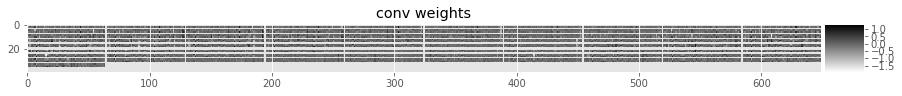

In [52]:
import pylab as pl
import matplotlib.cm as cm
import numpy.ma as ma
def make_mosaic(imgs, nrows, ncols, border=1):
    """
    Given a set of images with all the same shape, makes a
    mosaic with nrows and ncols
    """

    nimgs = imgs.shape[0]
    imshape = imgs.shape[1:]
    
    mosaic = ma.masked_all((nrows * imshape[0] + (nrows - 1) * border,
                            ncols * imshape[1] + (ncols - 1) * border),
                            dtype=np.float32)
    
    paddedh = imshape[0] + border
    paddedw = imshape[1] + border
    for i in range(nimgs):
        row = int(np.floor(i / ncols))
        col = i % ncols
        
        mosaic[row * paddedh:row * paddedh + imshape[0],
               col * paddedw:col * paddedw + imshape[1]] = imgs[i]
    return mosaic
# utility functions
from mpl_toolkits.axes_grid1 import make_axes_locatable

def nice_imshow(ax, data, vmin=None, vmax=None, cmap=None):
    """Wrapper around pl.imshow"""
    if cmap is None:
        cmap = cm.jet
    if vmin is None:
        vmin = data.min()
    if vmax is None:
        vmax = data.max()
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    im = ax.imshow(data, vmin=vmin, vmax=vmax, interpolation='nearest', cmap=cmap)
    plt.colorbar(im, cax=cax)
#pl.imshow(make_mosaic(np.random.random((9, 10, 10)), 3, 3, border=1))

def plot_conv_weights(model):
    # Visualize weights
    W = model.get_weights()[0]
    print(len(W[0][0][0]))
    print(len(W))
    W = np.squeeze(W)
    print(W.shape)
    print(W.shape[2],W.shape[3])
    if len(W.shape) == 4:
        W = W.reshape((-1,W.shape[2],W.shape[3]))
        print()
    print("W shape : ", W.shape)

    plt.figure(figsize=(15, 15))
    plt.title('conv weights')
    s = int(np.sqrt(W.shape[0])+1)
    nice_imshow(pl.gca(), make_mosaic(W, s, s), cmap=cm.binary)

# usage
plot_conv_weights(model)

In [53]:
layer_name='conv2d_2'
W=Model(inputs=model.input,outputs=model.get_weights()[0])
W = np.squeeze(W)
if len(W.shape) == 4:
    W = W.reshape((-1,W.shape[2],W.shape[3]))
    print("W shape : ", W.shape)

plt.figure(figsize=(15, 15))
plt.title('conv weights')
s = int(np.sqrt(W.shape[0])+1)
nice_imshow(pl.gca(), make_mosaic(W, s, s), cmap=cm.binary)



TypeError: unhashable type: 'numpy.ndarray'

In [ ]:
len(np.squeeze(model.get_weights()[0]))

In [111]:
a = np.arange(6).reshape(2,3)
np.argmax(a)
np.argmax(a, axis=0)
#np.argmax(a, axis=1)

array([1, 1, 1])

In [117]:
np.argmax(a, axis=1)

array([2, 2])

In [119]:
a

array([[0, 1, 2],
       [3, 4, 5]])